In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/placement.csv')

In [ ]:
df.head()

,cgpa,resume_score,placed
0,8.14,6.52,1
1,6.17,5.17,0
2,8.27,8.86,1
3,6.88,7.27,1
4,7.52,7.30,1


/tmp/ipython-input-3528623143.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['cgpa'])
/tmp/ipython-input-3528623143.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['resume_score'])


<Axes: xlabel='resume_score', ylabel='Density'>

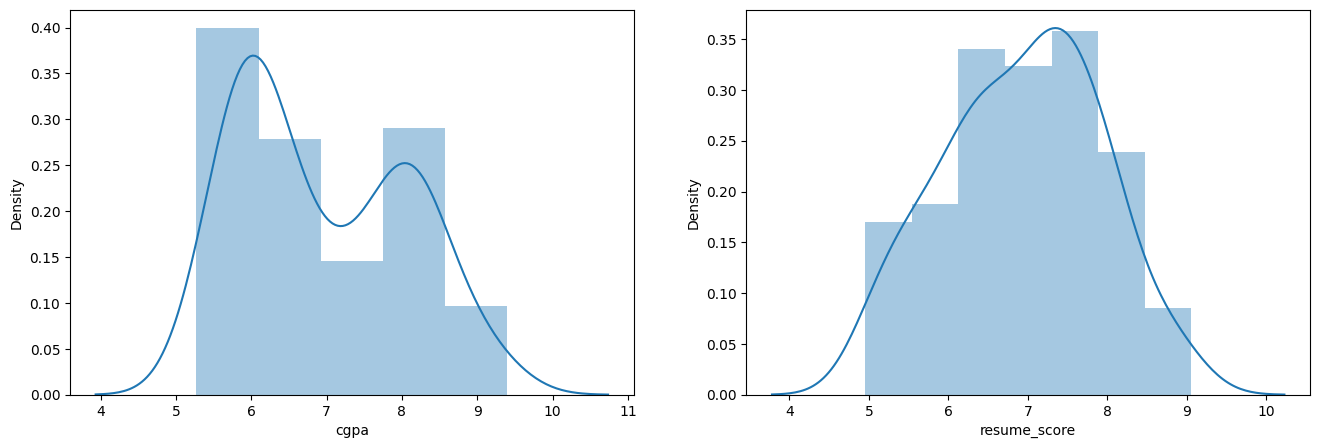

In [ ]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['cgpa'])

plt.subplot(1,2,2)
sns.distplot(df['resume_score'])
#

In [ ]:
from sklearn.model_selection import train_test_split
x = df.drop(columns=['placed'])
y = df['placed']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [ ]:
from sklearn.preprocessing import power_transform
pt = PowerTransformer(method='box-cox')

In [ ]:
from sklearn.preprocessing import FunctionTransformer
ft = FunctionTransformer(np.square)
x_train['cgpa'] = ft.fit_transform(x_train['cgpa'])
x_test['cgpa'] = ft.transform(x_test['cgpa'])

In [ ]:
x_train['resume_score'] = pt.fit_transform(x_train[['resume_score']])
x_test['resume_score'] = pt.transform(x_test[['resume_score']])

In [ ]:
x_train = pd.DataFrame(x_train,columns=x.columns)
x_test = pd.DataFrame(x_test,columns=x.columns)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

/tmp/ipython-input-2785517774.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train['cgpa'])
/tmp/ipython-input-2785517774.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train['resume_score'])


<Axes: xlabel='resume_score', ylabel='Density'>

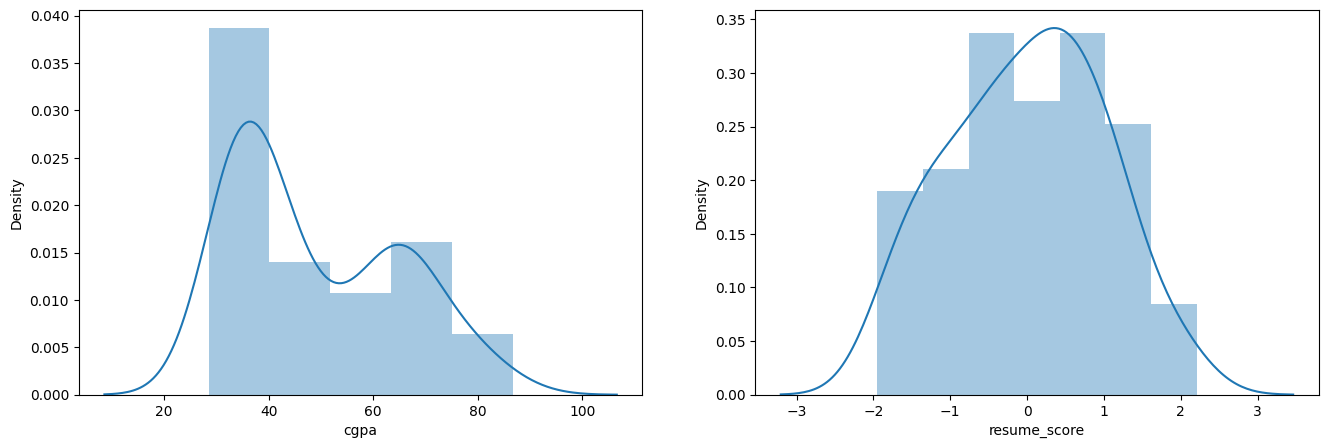

In [ ]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(x_train['cgpa'])

plt.subplot(1,2,2)
sns.distplot(x_train['resume_score'])

In [ ]:
print("Mean value of cgpa", x_train['cgpa'].mean())
print("Std value of cgpa", x_train['cgpa'].std())
print("min cgpa", x_train['cgpa'].min())
print("max cgpa", x_train['cgpa'].max())


Mean value of cgpa 48.96649625
Std value of cgpa 15.950168336411352
min cgpa 28.5156
max cgpa 86.6761


In [ ]:
print("highest allowed", x_train['cgpa'].mean() + 3*x_train['cgpa'].std())
print("lowe limit", x_train['cgpa'].mean() - 3*x_train['cgpa'].std())

highest allowed 96.81700125923405
lowe limit 1.1159912407659434


In [ ]:
print("highest allowed", x_train['resume_score'].mean() + 3*df['resume_score'].std())
print("lowe limit", x_train['resume_score'].mean() - 3*df['resume_score'].std())

highest allowed 9.869322816274323
lowe limit 3.991677183725676


In [ ]:
print("Mean value of resume", df['resume_score'].mean())
print("Std value of resume", df['resume_score'].std())
print("resume score max", df['resume_score'].min())
print("resume score min", df['resume_score'].max())


Mean value of resume 6.930499999999999
Std value of resume 0.9796076054247744
resume score max 4.95
resume score min 9.06


In [ ]:
df[(df['cgpa'] > 10.2) | (df['cgpa'] < 3.5)] #no outlier in that sense

,cgpa,resume_score,placed


In [ ]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='box-cox')

In [ ]:
new_df = df[(df['cgpa'] < 8.80) & (df['cgpa'] > 3.5)]

In [ ]:
df['cgpa__zscore'] = (df['cgpa'] - df['cgpa'].mean())/df['cgpa'].std()

In [ ]:
df.head()

,cgpa,resume_score,placed,cgpa__zscore
0,8.14,6.52,1,1.070228
1,6.17,5.17,0,-0.689957
2,8.27,8.86,1,1.186383
3,6.88,7.27,1,-0.055575
4,7.52,7.30,1,0.516261


In [ ]:
df[df['cgpa__zscore'] > 3]

,cgpa,resume_score,placed,cgpa__zscore


In [ ]:
df[df['cgpa__zscore'] < -3]

,cgpa,resume_score,placed,cgpa__zscore


In [ ]:
#capping

In [ ]:
upperlimit = df['cgpa'].mean() + 3*df['cgpa'].std()
lowerlimit = df['cgpa'].mean() - 3*df['cgpa'].std()

In [ ]:
upperlimit

np.float64(10.299800820932601)

In [ ]:
df['cgpa'] = np.where(
    df['cgpa'] > upperlimit,
    upperlimit,
    np.where(
        df['cgpa'] < lowerlimit,
        lowerlimit,
        df['cgpa']
    )
)